In [53]:
#ライブラリーをインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

In [25]:
#データの読み込み（カンマが小数点になるように読み込みを行う)
s_data=pd.read_csv("datasets_15999_45190_measurements.csv",decimal=",")
print(s_data.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


In [26]:
#データの中身を確認（欠損値を確認してみる）
print(s_data.info())
print(s_data.isnull().sum())
print(s_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
         distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   376.00

In [27]:
#temp_insideは平均値で欠損値を埋める
s_data.loc[s_data["temp_inside"].isnull(),["temp_inside"]]=s_data["temp_inside"].mean()
print(s_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      388 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [28]:
#specialはなんや？spcial.AC,rain,sunを見比べて判断する
data1=s_data.loc[s_data["specials"].notnull(),["specials","AC","rain","sun"]]
print(data1.head())
print(data1["specials"].value_counts())
print(s_data.loc[s_data["specials"]=="half rain half sun",["specials","AC","rain","sun"]])

   specials  AC  rain  sun
40  AC rain   1     1    0
41       AC   1     0    0
50     rain   0     1    0
53     rain   0     1    0
55     rain   0     1    0
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
AC snow                1
Name: specials, dtype: int64
               specials  AC  rain  sun
191  half rain half sun   0     1    0


In [29]:
#specialを綺麗にそろえてみる(カテゴライズしてみる？)
data1["specials"]=data1["specials"].replace(["ac"],"AC")
data1["specials"]=data1["specials"].replace(["sun ac","AC Sun"],"AC sun")
data1["specials"]=data1["specials"].replace(["ac rain"],"AC rain")
data1["specials"]=data1["specials"].replace(["ac rain"],"AC rain")
data1["specials"].value_counts()

rain                  32
sun                   27
AC                    14
AC rain               10
AC sun                 5
snow                   3
half rain half sun     1
AC snow                1
Name: specials, dtype: int64

In [30]:
#Specialsについては"AC rain" "AC snow"を１それ以外は０の2値カテゴリデータにする。
s_data["specials"]=s_data["specials"].replace(["ac rain","AC rain","AC snow"],1)
s_data.loc[s_data["specials"]!=1,"specials"]=0

s_data["specials"].value_counts()
print(s_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      388 non-null float64
temp_outside     388 non-null int64
specials         388 non-null int64
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 36.5+ KB
None


In [31]:
#補充したリッターや補充したガソリンの種類などはデータ数も少ないし、あんまり重要じゃないと判断（ドロップする）
s_data=s_data.drop(["refill liters","refill gas"],axis=1)
print(s_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
distance        388 non-null float64
consume         388 non-null float64
speed           388 non-null int64
temp_inside     388 non-null float64
temp_outside    388 non-null int64
specials        388 non-null int64
gas_type        388 non-null object
AC              388 non-null int64
rain            388 non-null int64
sun             388 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB
None


In [32]:
#ガソリンタイプはカテゴリデータに変えておく(SP98=1,E10=0)
print(s_data["gas_type"].value_counts())
s_data.loc[s_data["gas_type"]=='SP98',["gas_type"]]=1
s_data.loc[s_data["gas_type"]=='E10',["gas_type"]]=0
print(s_data["gas_type"].value_counts())
#s_data["gas_type"]=s_data.loc["gas_"]

SP98    228
E10     160
Name: gas_type, dtype: int64
1    228
0    160
Name: gas_type, dtype: int64


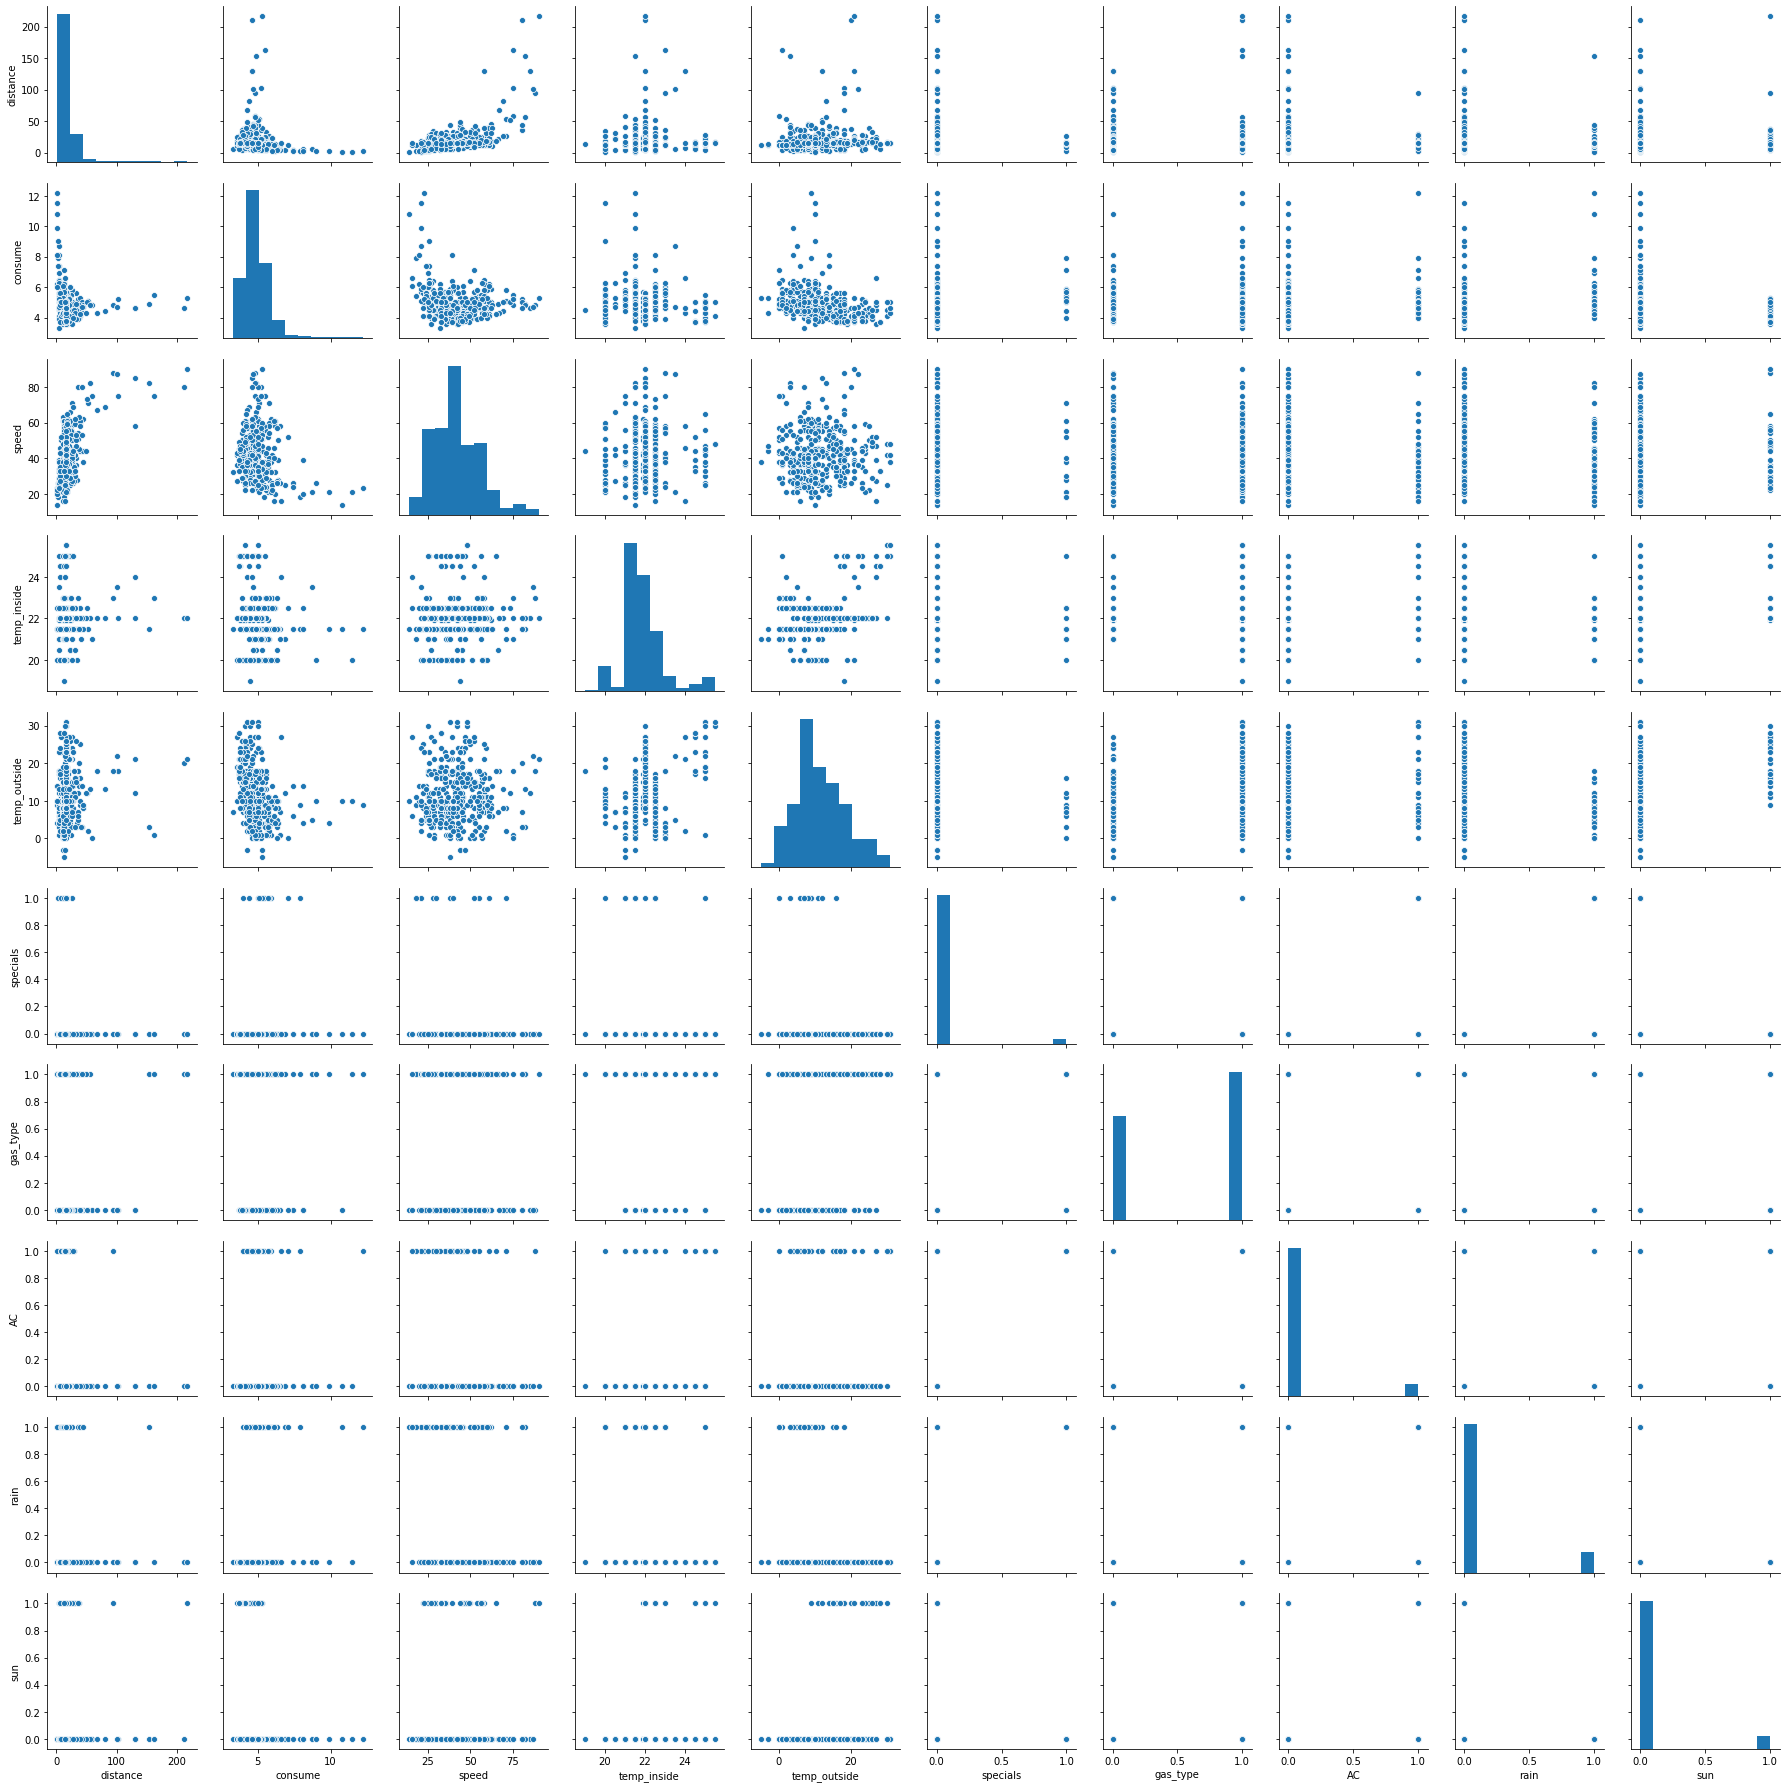

In [33]:
#データの関連を見てみる(まずはペアプロット)→ようわからん
sns.pairplot(s_data)

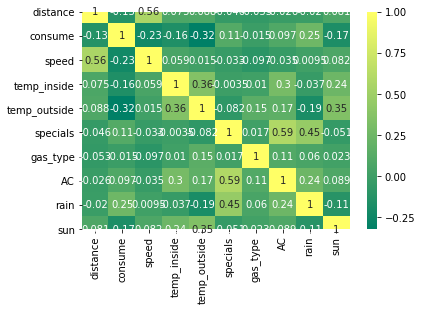

In [34]:
#データの相関を見てみる（ヒートマップを使用）→「"consume","distance","speed","temp_inside","temp_outside","gas_type","rain"」
sns.heatmap(s_data.corr(),cmap="summer",annot=True)
plt.show()

In [37]:
#目的変数と説明変数の決定
#目的変数は「consume」
y=s_data["consume"].values
#説明変数は「"distance","speed","temp_inside","temp_outside","gas_type","rain"」
X=s_data[["distance","speed","temp_inside","temp_outside","gas_type","rain"]].values

In [40]:
#線形回帰をふぃっと#モデルの選択と構築
regr=LinearRegression(fit_intercept=True)
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#モデルの係数を確認
w0=regr.intercept_
w1=regr.coef_[0]
w2=regr.coef_[1]
w3=regr.coef_[2]
w4=regr.coef_[3]
w5=regr.coef_[4]
w6=regr.coef_[5]
print(f"w0={w0:.3f},w1={w1:.3f},w2={w2:.3f},w3={w3:.3f},w4={w4:.3f},w5={w5:.3f},w6={w6:.3f}")

w0=7.092,w1=0.002,w2=-0.019,w3=-0.048,w4=-0.039,w5=-0.020,w6=0.629


In [50]:
#二乗誤差の計測（モデルの評価）「"distance","speed","temp_inside","temp_outside","gas_type","rain"」
x1=s_data["distance"].values
x2=s_data["speed"].values
x3=s_data["temp_inside"].values
x4=s_data["temp_outside"].values
x5=s_data["gas_type"].values
x6=s_data["rain"].values

y_est=w0+w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
squared_error=0.5*(np.sum((y-y_est)**2))
print(f"二乗誤差:{squared_error}")

二乗誤差:166.60446279849532


In [51]:
#MSE、RMSE、MAEを求める
MSE=np.sum((y-y_est)**2)
RSE=np.sqrt(MSE)
MAE=np.sum(np.abs(y-y_est))

print(f"MSE:{MSE},RSE:{RSE},MAE:{MAE}")

MSE:333.20892559699064,RSE:18.25401121937287,MAE:240.45683694108442


In [54]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.859
MAE = 0.62
RMSE = 0.927
